In [7]:
import numpy as np
from scipy import ndimage
from scipy.spatial.transform import Rotation as R

target =    [0, 3, 4] # anchor vector connecting centroid and anchor point
reference = [1, 0, 0]    # unit vector along x axis

rotation_matrix = R.align_vectors(np.array([reference]), np.array([target]))[0].as_matrix()
rotation_matrix @ np.array(target)

array([5., 0., 0.])

In [2]:
rotations = R.align_vectors(np.array([reference]), np.array([target]))[0].as_euler('xyz')*(360/(2*np.pi))
rotations
# positive rotations are always anti-clockwise

array([-53.13010235,   0.        , -90.        ])

In [3]:
n = 3
scalar_field = np.arange(n**3).reshape((n,n,n))

for axis, angle in enumerate(rotations):
    axes = [0,1,2]
    axes.remove(axis)
    scalar_field = ndimage.rotate(scalar_field, angle, axes=tuple(axes), reshape=False)




print(scalar_field)

[[[ 0 19  0]
  [ 0 10  0]
  [ 0  1  0]]

 [[24 22 20]
  [15 13 11]
  [ 6  4  2]]

 [[ 0 25  0]
  [ 0 16  0]
  [ 0  7  0]]]


In [4]:
def _rotate_scalar_field(array, rotations):
    '''
    :params array:      an input scalar field with shape (a,b,c)
    :params rotations:  tuple of shape (1,3) with rotation 
                        angles along x, y, z axes, in degrees
    :params pivot:      pivot of the rotation
    :return:            rotated array
    '''
    for axis, angle in enumerate(rotations):
        axes = [0,1,2]
        axes.remove(axis)
        array = ndimage.rotate(array, angle, axes=tuple(axes), reshape=False)
    return array


In [5]:
def _orient_along_x(array, vector):
    '''
    :params array:    array of atomic coordinates arrays: len(array) structures with len(array[i]) atoms
    :params vector:   list of shape (1,3) with anchor vector to align to the x axis
    :return:          array, aligned so that vector is on x
    '''
    assert vector.shape[1] == 3
    if vector.shape[0] > 1:
        vector = np.mean(vector, axis=0)
    rotation_matrix = R.align_vectors(np.array([[1,0,0]]), np.array([vector]))[0].as_matrix()
    return np.array([rotation_matrix @ v for v in array])

In [6]:
vectors = np.array([[0,1,0],
                    [0,4,0],
                    [1,0,0],
                    [0,0,9],
                    [1,1,1]])
_orient_along_x(vectors, vectors[0])

IndexError: tuple index out of range

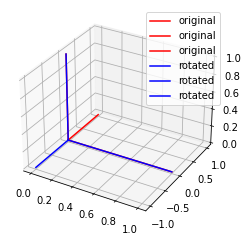

In [163]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

def _orient_along_x(array, vector):
    '''
    :params array:    array of atomic coordinates arrays: len(array) structures with len(array[i]) atoms
    :params vector:   list of shape (1,3) with anchor vector to align to the x axis
    :return:          array, aligned so that vector is on x
    '''
    rotation_matrix = R.align_vectors(np.array([[1,0,0]]), np.array([vector]))[0].as_matrix()
    return np.array([rotation_matrix @ v for v in array])

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

vectors = np.array([[0,1,0],
                    [1,0,0],
                    [0,0,1]])

x = [v[0] for v in vectors]
y = [v[1] for v in vectors]
z = [v[2] for v in vectors]

for i in range(len(x)):
    ax.plot([0, x[i]], [0, y[i]], [0, z[i]], label='original', color='r')

vectors = _orient_along_x(vectors, vectors[0])

x = [v[0] for v in vectors]
y = [v[1] for v in vectors]
z = [v[2] for v in vectors]

for i in range(len(x)):
    ax.plot([0, x[i]], [0, y[i]], [0, z[i]], label='rotated', color='b')

ax.legend()
plt.show()

In [20]:
a = np.arange(3**3).reshape((3,3,3))
_rotate_scalar_field(a, np.array([45,0,0]))

array([[[ 0,  2,  0],
        [ 0,  4,  8],
        [ 0,  6,  0]],

       [[ 0, 11,  0],
        [ 9, 13, 17],
        [ 0, 15,  0]],

       [[ 0, 20,  0],
        [18, 22, 26],
        [ 0, 24,  0]]])